In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

#Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from code import tools as tl
from code.fbprophet import prophet_util as fp

Importing plotly failed. Interactive plots will not work.


#### Load and process data

In [ ]:
###################

In [20]:
df = tl.load_data('./data/sample_data.csv') #read in data from file
df = tl.prepare_data(df,'Date', 'Weekly_Sales') # select 'ds' and 'y'
df.head()

,ds,y,IsHoliday
0,2010-05-02,24924.50,False
1,2010-12-02,46039.49,True
2,2010-02-19,41595.55,False
3,2010-02-26,19403.54,False
4,2010-05-03,21827.90,False


In [21]:
df1 = tl.group_by_date(df, 'M','2010-01-01','2012-12-31') # group by date
df1.shape

(36, 3)

In [22]:
df_tr, df_tst = tl.train_test_split(df1,'2011-12-31','2012-12-31')

train shape (24, 3)
test shape (12, 3)


In [ ]:
#######################

In [3]:
df = tl.load_data('./data/For Naomi.csv')
df = tl.prepare_data(df,'消費日期','消費金額')

In [4]:
df1 = tl.group_by_date(df,'M', '2015-01-01', '2020-08-31') 

In [5]:
df1.head()

,ds,y,交易筆數
0,2015-01-01,127105351,90900
1,2015-02-01,164101848,105431
2,2015-03-01,129842426,85835
3,2015-04-01,151050924,94711
4,2015-05-01,154957932,104586


#### Split data for training and testing

In [6]:
df_tr, df_tst = tl.train_test_split(df1,'2017-12-31','2018-12-31')

train shape (36, 3)
test shape (12, 3)


### Model Training

In [7]:
prophet = fp.Prophet_Impl(df_tr,df_tst)

#### Hyperparmeter tuning

In [8]:
# Generate all combinations of parameters
params_grid = {'seasonality_mode':['multiplicative','additive'], 
               'changepoint_prior_scale': [0.001, 0.002, 0.005, 0.05, 0.5],  # default 0.05, reasonable range [0.001, 0.5]
               'seasonality_prior_scale': [0.01, 0.02, 0.05, 0.1, 1, 10.0],  # default 10, reasonable range [0.01, 10]
               'changepoint_range' : [0.8, 0.85, 0.9, 0.95] 
              }

all_params = fp.generate_all_params(params_grid)

Total Possible Models 240


In [ ]:
'''
tuning data: '2018-01-01', '2018-12-31'
adjust period, freq for different prediction result,
ex: period = 365, freq = 'D', or peroid = 12, freq = 'MS'
'''
best_params, tuning_results = fp.hyperparam_tuning(all_params,df_tr, df_tst, 
                     '2018-01-01', '2018-12-31',period = 12, freq = 'MS') 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [54]:
best_params

{'changepoint_prior_scale': 0.05,
 'changepoint_range': 0.8,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 0.02}

#### Use best parameters to train the model

In [55]:
prophet.train(**best_params)
prophet.predict(12,'MS')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
prophet.forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,1.479350e+08,1.222654e+08,1.557118e+08,1.479350e+08,1.479350e+08,-8.554035e+06,-8.554035e+06,-8.554035e+06,-8.554035e+06,-8.554035e+06,-8.554035e+06,0.0,0.0,0.0,1.393810e+08
1,2015-02-01,1.480956e+08,1.301444e+08,1.627667e+08,1.480956e+08,1.480956e+08,-1.833086e+06,-1.833086e+06,-1.833086e+06,-1.833086e+06,-1.833086e+06,-1.833086e+06,0.0,0.0,0.0,1.462626e+08
2,2015-03-01,1.482407e+08,1.099901e+08,1.431224e+08,1.482407e+08,1.482407e+08,-2.180568e+07,-2.180568e+07,-2.180568e+07,-2.180568e+07,-2.180568e+07,-2.180568e+07,0.0,0.0,0.0,1.264350e+08
3,2015-04-01,1.484013e+08,1.362149e+08,1.688833e+08,1.484013e+08,1.484013e+08,5.212266e+06,5.212266e+06,5.212266e+06,5.212266e+06,5.212266e+06,5.212266e+06,0.0,0.0,0.0,1.536136e+08
4,2015-05-01,1.485568e+08,1.311515e+08,1.654517e+08,1.485568e+08,1.485568e+08,6.891552e+05,6.891552e+05,6.891552e+05,6.891552e+05,6.891552e+05,6.891552e+05,0.0,0.0,0.0,1.492459e+08
5,2015-06-01,1.487174e+08,1.080293e+08,1.415412e+08,1.487174e+08,1.487174e+08,-2.336037e+07,-2.336037e+07,-2.336037e+07,-2.336037e+07,-2.336037e+07,-2.336037e+07,0.0,0.0,0.0,1.253570e+08
6,2015-07-01,1.488728e+08,1.137731e+08,1.467163e+08,1.488728e+08,1.488728e+08,-1.961073e+07,-1.961073e+07,-1.961073e+07,-1.961073e+07,-1.961073e+07,-1.961073e+07,0.0,0.0,0.0,1.292621e+08
7,2015-08-01,1.490334e+08,1.093578e+08,1.410087e+08,1.490334e+08,1.490334e+08,-2.420076e+07,-2.420076e+07,-2.420076e+07,-2.420076e+07,-2.420076e+07,-2.420076e+07,0.0,0.0,0.0,1.248327e+08
8,2015-09-01,1.491941e+08,8.835740e+07,1.205515e+08,1.491941e+08,1.491941e+08,-4.448273e+07,-4.448273e+07,-4.448273e+07,-4.448273e+07,-4.448273e+07,-4.448273e+07,0.0,0.0,0.0,1.047113e+08
9,2015-10-01,1.493495e+08,2.748489e+08,3.076916e+08,1.493495e+08,1.493495e+08,1.419162e+08,1.419162e+08,1.419162e+08,1.419162e+08,1.419162e+08,1.419162e+08,0.0,0.0,0.0,2.912657e+08


#### Evaluatin of the result

In [57]:
df_pred = tl.slice_df(prophet.forecast,'2019-01-01', '2019-12-31', ['ds','yhat'])
tl.calc_mape(df_pred, df_tst,'M','2019-01-01', '2019-12-31')

0.06381271592705955

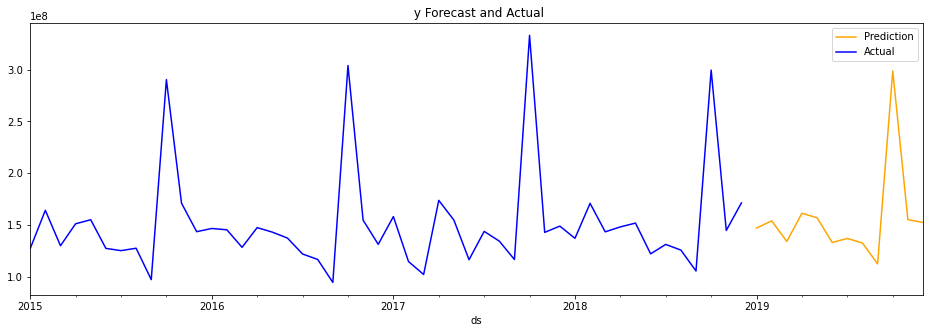

In [58]:
tl.plot_predict_and_actual(df_pred, df_tr)

(12, 2) (12, 3)


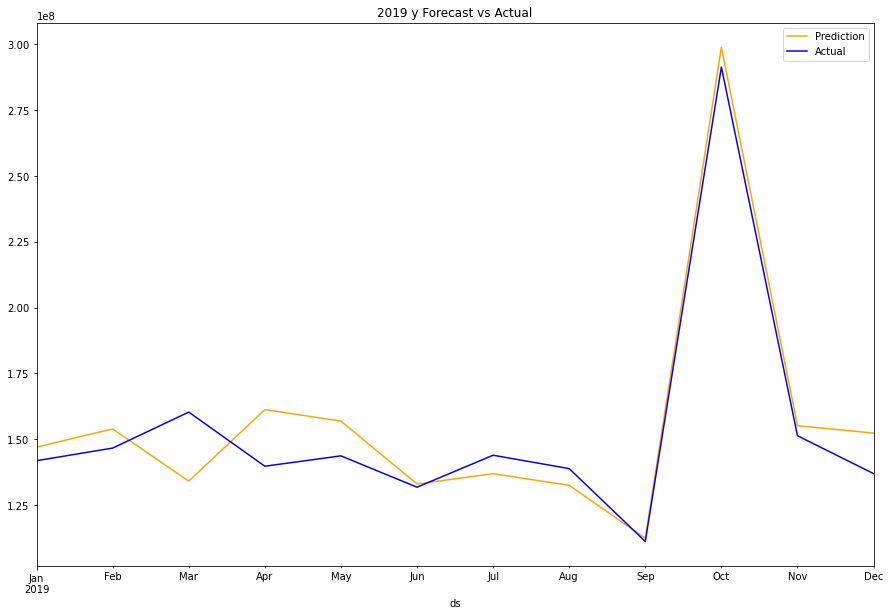

In [59]:
tl.plot_predict_vs_actual(df_pred, df_tst, 'M', '2019-01-01', '2019-12-31')

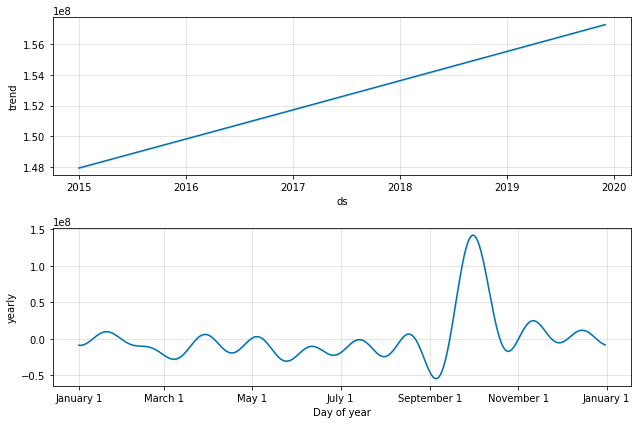

In [60]:
# Plot the components of the model
fig2=prophet.model.plot_components(prophet.forecast)

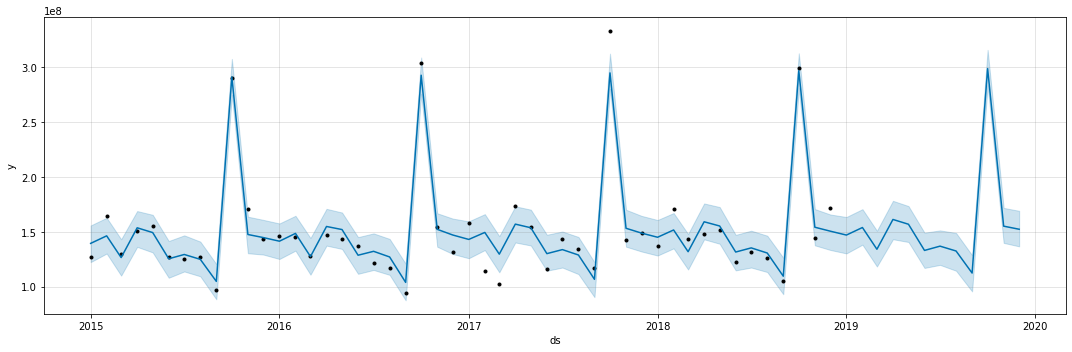

In [61]:
# Plot the forecast
fig, ax = plt.subplots(figsize=(15,5))
fig = prophet.model.plot(prophet.forecast,ax=ax)
plt.show()

In [62]:
tl.save_to_file(prophet.forecast, ['ds','yhat'],'test.csv' )